In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as nm

Using TensorFlow backend.


In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as bk

In [4]:
inv3 = InceptionV3()














96116736/96112376 [==============================] - 8s 0us/step


In [3]:
print(inv3.summary())

NameError: ignored

In [26]:
from keras.preprocessing import image
from google.colab import files

files.upload()

Saving gatito1.jpg to gatito1.jpg


{'gatito1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x00\xb4\x01h\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xd0Z6[\xad1\xc5d\x8ciY*\xa4sZ\x05k\x96\xd8\xc1\x06\xab!\xc2\x8f\x10\x96X\xc8\xac@\x10\x05\x1c-\x814XVUD\x8cj\xb6\x1a1c#V\x9dVuA.i\xa7\x0bU\xe4\x8e\x91 !59v\x99&\xb3/x\xc6)\xe7U\x96(\xb7e\xcb\x9d\x13j[+\x19\xcc\xeb\x15\xecA\x05\x01\xc2\xa0LXVUD`\xd5d4j\xc6F\xac\x8e\xaaj\x82\

In [36]:
# Cargo y redimension imagen
x = image.img_to_array(image.load_img("hacked.png", target_size=(299 , 299)))
# Cambio de rango 0-255 a -1 a 1
x /= 255
x -= 0.5
x *= 2

# Para Incepsionnv3 necesita de parametro un tensor de 4 dimensiones diferentes Esto se refiere que si de unnica de entrada puede caber mas de una imagen
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = inv3.predict(x)
print(x.shape)

(1, 299, 299, 3)


In [37]:
decode_predictions(y)

[[('n04372370', 'switch', 0.069305524),
  ('n03291819', 'envelope', 0.050839152),
  ('n01930112', 'nematode', 0.028565258),
  ('n03729826', 'matchstick', 0.021662088),
  ('n04153751', 'screw', 0.018571535)]]

In [0]:
# Atacks adversarios

In [38]:
in_layer = inv3.layers[0].input
out_layer = inv3.layers[-1].output

# Class 951 is Lemon
target = 951

loss = out_layer[0, target]

# Apply gradient 

grad = bk.gradients(loss, in_layer)[0]

#Optimace gradien

opt_gradient = bk.function([in_layer, bk.learning_phase()], [grad, loss])

# Copy photo
adv = nm.copy(x)

#Function cost
cost = 0.0

per = 0.01
max_per = x + 0.01
min_per = x - 0.01

while cost < 0.95:
  gr, cost = opt_gradient([adv, 0])
  
  adv += gr
  
  adv = nm.clip(adv , min_per, max_per)
  adv = nm.clip(adv , 1, -1)
  
  print("Target cost", cost)

Target cost 0.0012864695
Target cost 0.0024103206
Target cost 0.0022628696
Target cost 0.0032641913
Target cost 0.0018176079
Target cost 0.0020093457
Target cost 0.0013117207
Target cost 0.002711403
Target cost 0.0036393763
Target cost 0.0018717147
Target cost 0.0025658715
Target cost 0.0023737822
Target cost 0.0026639702
Target cost 0.0018108549
Target cost 0.0020013612
Target cost 0.002906194
Target cost 0.002368885
Target cost 0.0012493939
Target cost 0.0027390698
Target cost 0.002226976
Target cost 0.002266022
Target cost 0.002309567
Target cost 0.0036204788
Target cost 0.0016704702
Target cost 0.0013579595
Target cost 0.0017074416
Target cost 0.0018037178
Target cost 0.0023559965
Target cost 0.0011953189
Target cost 0.0026018007
Target cost 0.0033879066
Target cost 0.0017425615
Target cost 0.0020308953
Target cost 0.0014091175
Target cost 0.0017717321
Target cost 0.00092708285
Target cost 0.003973014
Target cost 0.0022840418
Target cost 0.003054336
Target cost 0.0038087897
Target 

KeyboardInterrupt: ignored

In [32]:
adv /= 2
adv += 0.5
adv *= 255

print(adv.shape)

(1, 299, 299, 3)


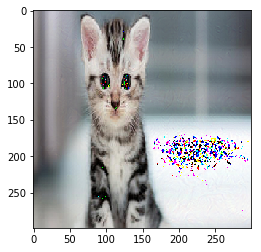

In [33]:
plt.imshow(adv[0].astype(nm.uint8))
plt.show()

In [0]:
adv /= 2
adv += 0.5
adv *= 255



In [0]:
from PIL import Image
im = Image.fromarray(adv[0].astype(nm.uint8))
im.save("hacked.png")